In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\Danile\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#establishing connection to the database

con = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [3]:
cur = con.cursor()

In [4]:
#fetching all the columns in the accident table

col_accident = cur.execute(f"PRAGMA table_info(accident)")
col_accident.fetchall()

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [5]:
#fetching all the columns in the vehicle table

col_vehicle = cur.execute(f"PRAGMA table_info(vehicle)")
col_vehicle.fetchall()

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [6]:
#fetching all the columns in the casualty table

col_casualty = cur.execute(f"PRAGMA table_info(casualty)")
col_casualty.fetchall()

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [7]:
##fetching all the columns in the lsoa table

col_lsoa = cur.execute(f"PRAGMA table_info(lsoa)")
col_lsoa.fetchall()

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [8]:
# Tables in the database
tables = ["accident", "vehicle", "casualty", "lsoa"]

# Dictionary to store column names for each table
column_names = {}

# Retrieve column names for each table
for table in tables:
    cur.execute(f"PRAGMA table_info({table})")
    columns = [column[1] for column in cur.fetchall()]
    column_names[table] = columns

# Print the column names for each table
for table, columns in column_names.items():
    print(f"Columns for table '{table}':")
    print(columns)
    print()

Columns for table 'accident':
['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']

Columns for table 'vehicle':
['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulati

In [9]:
#printing lenght of tables

table_lengths = {}
for table in tables:
    cur.execute(f"SELECT COUNT(*) FROM {table}")
    length = cur.fetchone()[0]
    table_lengths[table] = length
    
for table, length in table_lengths.items():
    print(f"Length of table '{table}': {length}")

Length of table 'accident': 461352
Length of table 'vehicle': 849091
Length of table 'casualty': 600332
Length of table 'lsoa': 34378


### Fetching The Accident, Casualty and Vehicle Tables for The Year 2020

In [10]:
# Retrieving the data from the accident, vehicle, and casualty tables for the year 2020 and converting them into a dataframe

accident_data = pd.read_sql_query("SELECT * FROM accident WHERE accident_year = 2020", con)

vehicle_data = pd.read_sql_query("SELECT * FROM vehicle WHERE accident_year = 2020", con)
    
casualty_data = pd.read_sql_query("SELECT * FROM casualty WHERE accident_year = 2020", con)

# Print the DataFrames
print("Accident DataFrame:")
print(accident_data)
#print()

print("Vehicle DataFrame:")
print(vehicle_data)
#print()

print("Casualty DataFrame:")
print(casualty_data)

Accident DataFrame:
      accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       

## Data Cleaning- Stage 1

In [11]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [12]:
casualty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [13]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [14]:
# There exists 4 columns with missing values

accident_data.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [15]:
# longitude data type is a string which should not be

accident_data['longitude'].unique()

array([-0.254001, -0.139253, -0.178719, ..., -2.271903, -3.968753,
       -4.56104 ])

In [16]:
# latitude data type is a string which should not be

accident_data['latitude'].unique()

array([51.462262, 51.470327, 51.529614, ..., 57.186317, 55.95094 ,
       56.003843])

In [17]:
#converting both columns to float so that it will be included in my analysis

accident_data['longitude'] = accident_data['longitude'].astype(float)
accident_data['latitude'] = accident_data['latitude'].astype(float)

In [18]:
#filling all the missing values in accident table
#They could be potential useful columns for feature analysis

def accident_nan():
    accident_data["longitude"].fillna(accident_data["longitude"].mean(), inplace=True)
    accident_data["latitude"].fillna(accident_data["latitude"].mean(), inplace=True)
    accident_data["location_easting_osgr"].fillna(accident_data["location_easting_osgr"].mean(), inplace=True)
    accident_data["location_northing_osgr"].fillna(accident_data["location_easting_osgr"].mean(), inplace=True)  
accident_nan()

In [19]:
accident_data

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [20]:
casualty_data.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [21]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [22]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

### 1a. Significant hours of the day, and days of the week, on which accidents occur

In [23]:
# Significant hours in the day which accident occur using a 1 hour time range

cur.execute("""
    SELECT strftime('%H', time) || ':00 - ' || strftime('%H', time) || ':59' AS time_range,
           COUNT(*) AS accident_count
    FROM accident WHERE accident_year=2020
    GROUP BY strftime('%H', time)
    ORDER BY strftime('%H', time) 
""")

# This gives results of the accident occurrence by time
acc_occurr = cur.fetchall()

# Print the results
for i in acc_occurr:
    time_range = i[0]
    accident_count = i[1]
    print("Time range:", time_range, "Accident count:", accident_count)


Time range: 00:00 - 00:59 Accident count: 1188
Time range: 01:00 - 01:59 Accident count: 915
Time range: 02:00 - 02:59 Accident count: 658
Time range: 03:00 - 03:59 Accident count: 566
Time range: 04:00 - 04:59 Accident count: 508
Time range: 05:00 - 05:59 Accident count: 855
Time range: 06:00 - 06:59 Accident count: 1830
Time range: 07:00 - 07:59 Accident count: 3736
Time range: 08:00 - 08:59 Accident count: 5267
Time range: 09:00 - 09:59 Accident count: 3917
Time range: 10:00 - 10:59 Accident count: 4173
Time range: 11:00 - 11:59 Accident count: 4812
Time range: 12:00 - 12:59 Accident count: 5395
Time range: 13:00 - 13:59 Accident count: 5741
Time range: 14:00 - 14:59 Accident count: 6245
Time range: 15:00 - 15:59 Accident count: 7361
Time range: 16:00 - 16:59 Accident count: 7381
Time range: 17:00 - 17:59 Accident count: 7813
Time range: 18:00 - 18:59 Accident count: 6618
Time range: 19:00 - 19:59 Accident count: 5048
Time range: 20:00 - 20:59 Accident count: 3715
Time range: 21:00 

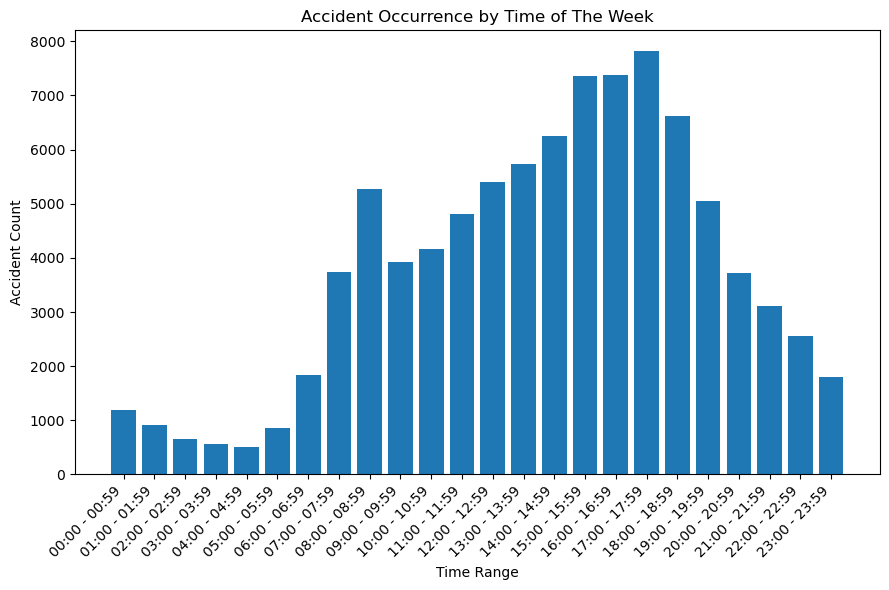

In [24]:
#plot of significant hours of the day when accidents occur

acc_time = []
acc_count = []

for i in acc_occurr:
    time_range = i[0]
    accident_count = i[1]
    acc_time.append(time_range)
    acc_count.append(accident_count)

# Plotting the data as a bar plot
plt.figure(figsize=(9, 6))
plt.bar(acc_time, acc_count)
plt.xlabel("Time Range")
plt.ylabel("Accident Count")
plt.title("Accident Occurrence by Time of The Week")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 1b. Significant days of the week on which accidents occur

In [25]:
#significant days of the week when accidents occur

cur.execute("""
    SELECT strftime('%w', day_of_week) AS day_of_week,
           SUM(1) AS accident_count
    FROM accident WHERE accident_year=2020
    GROUP BY day_of_week
    ORDER BY accident_count DESC
""")

# Fetch the results of the accident occurrence
acc_day = cur.fetchall()

# Print the results
for i in acc_day:
    day_of_week = int(i[0]) + 1
    accident_count = i[1]
    print("Day of the week:", day_of_week, "Accident count:", accident_count)


Day of the week: 1 Accident count: 14889
Day of the week: 7 Accident count: 14056
Day of the week: 6 Accident count: 13564
Day of the week: 5 Accident count: 13267
Day of the week: 4 Accident count: 12772
Day of the week: 2 Accident count: 12336
Day of the week: 3 Accident count: 10315


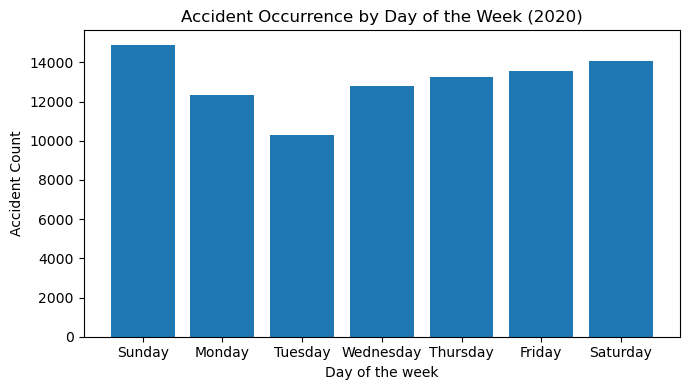

In [26]:
# plot of significant days of the week when accidents occur

acc_info = {}

# Days of the week labels
week_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

for i in acc_day:
    day_of_week = int(i[0]) + 1
    accident_count = i[1]
    day_label = week_days[day_of_week - 1]
    acc_info[day_label] = accident_count

# Plotting the data as a bar plot
plt.figure(figsize=(7, 4))
plt.bar(week_days, [acc_info[day] for day in week_days])
plt.xlabel("Day of the week")
plt.ylabel("Accident Count")
plt.title("Accident Occurrence by Day of the Week (2020)")
plt.tight_layout()
plt.show()

### 2a. For motorbikes significant hours of the day on which accidents occur

In [27]:
#query to fetching the results for 4 categories of motocycle accidents
#over 50cc and up to 125cc category was shortened to under_125cc, for ease of variable naming and plotting
# M/cycle 50cc and under category was shortened to under_50cc for ease of variable naming and plotting

cur.execute("""
    SELECT strftime('%H', time) || ':00 - ' || strftime('%H', time) || ':59' AS time_range,
           SUM(CASE WHEN vehicle.vehicle_type = 2 THEN 1 ELSE 0 END) AS under_50cc,
           SUM(CASE WHEN vehicle.vehicle_type = 3 THEN 1 ELSE 0 END) AS under_125cc,
           SUM(CASE WHEN vehicle.vehicle_type = 4 THEN 1 ELSE 0 END) AS over_125cc_up_to_500cc,
           SUM(CASE WHEN vehicle.vehicle_type = 5 THEN 1 ELSE 0 END) AS over_500cc
    FROM accident 
    JOIN vehicle ON accident.accident_index = vehicle.accident_index
    WHERE (vehicle.vehicle_type = 2 OR vehicle.vehicle_type = 3 OR vehicle.vehicle_type = 4 OR vehicle.vehicle_type = 5)
          AND accident.accident_year = 2020
    GROUP BY strftime('%H', time)
    ORDER BY strftime('%H', time) 
""")

# Fetch the results of motorbike accidents by time of the day
motorbike_accident = cur.fetchall()

In [28]:
# Create a DataFrame from the fetched results
columns = ["time_range", "under_50cc", "under_125cc", "over_125cc_up_to_500cc", "over_500cc"]
df_motorbike_acc_time = pd.DataFrame(motorbike_accident, columns=columns)

# Print the DataFrame
df_motorbike_acc_time

,time_range,under_50cc,under_125cc,over_125cc_up_to_500cc,over_500cc
0,00:00 - 00:59,5,68,17,11
1,01:00 - 01:59,5,55,18,17
2,02:00 - 02:59,6,31,4,8
3,03:00 - 03:59,5,25,5,7
4,04:00 - 04:59,2,28,9,4
5,05:00 - 05:59,5,54,13,44
6,06:00 - 06:59,16,117,35,91
7,07:00 - 07:59,19,274,77,180
8,08:00 - 08:59,54,250,62,133
9,09:00 - 09:59,34,211,54,123


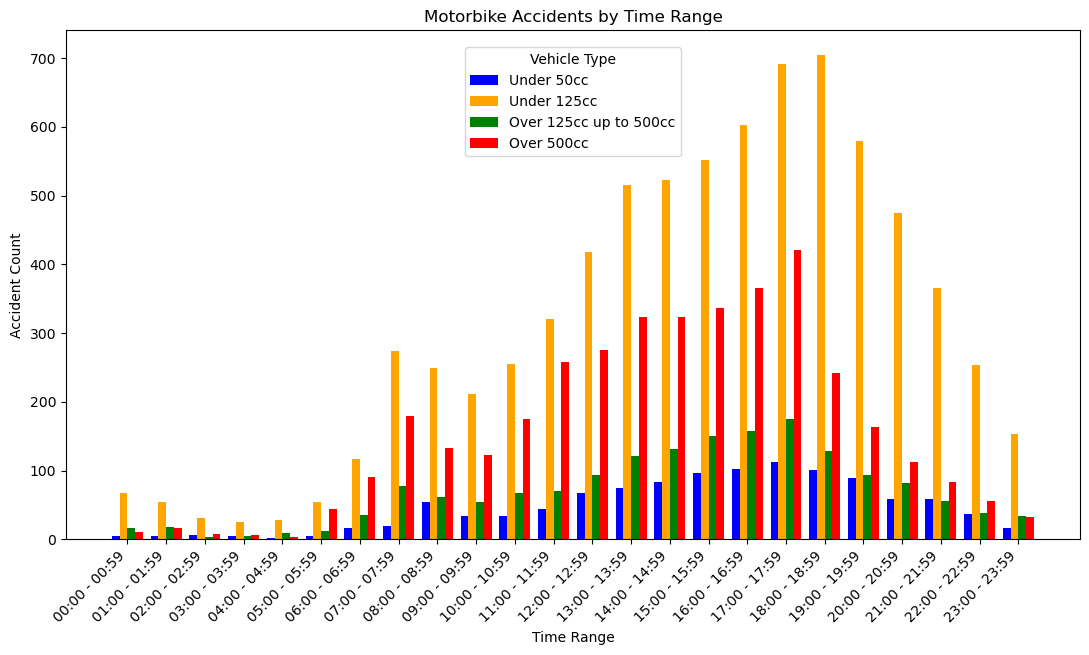

In [29]:
# Creating a DataFrame from the fetched results for the 4 categories of motorcycle

columns = ["time_range", "under_50cc", "under_125cc", "over_125cc_up_to_500cc", "over_500cc"]
df_motorbike_acc_time = pd.DataFrame(motorbike_accident, columns=columns)

# Converting time_range to numeric values
df_motorbike_acc_time["time_range_numeric"] = df_motorbike_acc_time["time_range"].str.split(":").str[0].astype(int)

# Creating a larger multibar plots for the 4 motorcycle categories
fig, ax = plt.subplots(figsize=(11, 7))  

# Get the time_range_numeric values for the x-axis
x = df_motorbike_acc_time["time_range_numeric"]

# Plotting th motorcycle for the 4 categories
ax.bar(x - 0.3, df_motorbike_acc_time["under_50cc"], width=0.2, align='center', label="Under 50cc", color='blue')
ax.bar(x - 0.1, df_motorbike_acc_time["under_125cc"], width=0.2, align='center', label="Under 125cc", color='orange')
ax.bar(x + 0.1, df_motorbike_acc_time["over_125cc_up_to_500cc"], width=0.2, align='center', label="Over 125cc up to 500cc", color='green')
ax.bar(x + 0.3, df_motorbike_acc_time["over_500cc"], width=0.2, align='center', label="Over 500cc", color='red')

# labelling the plot
plt.title("Motorbike Accidents by Time Range")
plt.xlabel("Time Range")
plt.ylabel("Accident Count")
plt.xticks(x, df_motorbike_acc_time["time_range"], rotation=45, ha="right")  

# Placing the color legend centered inside the plot
plt.legend(title="Vehicle Type", loc="upper center", bbox_to_anchor=(0.5, 0.98), bbox_transform=ax.transAxes, prop={'size': 10})  # Adjust font size

# Add some space to the top of the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  

# Show the plot
plt.show()


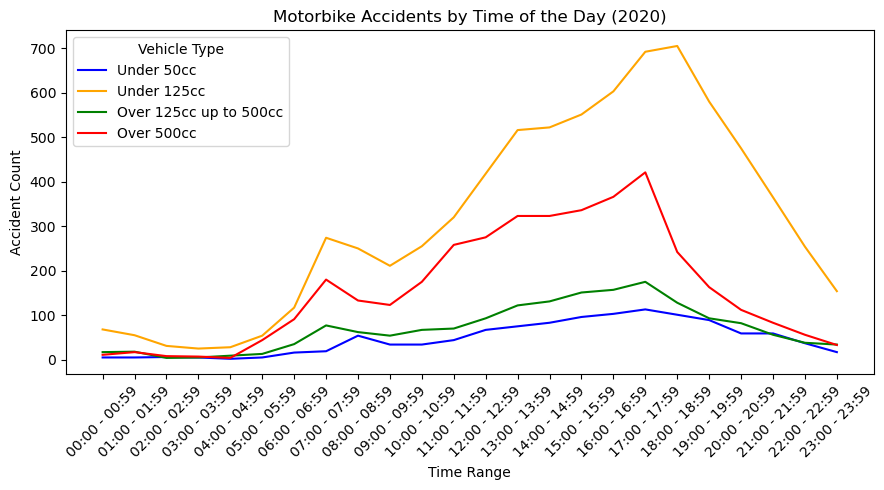

In [30]:
# Creating a line plot line plot to view the motorcycle accident plot
plt.figure(figsize=(9, 5))

# Ploting the 4 motorcycle categories
plt.plot(df_motorbike_acc_time["time_range"], df_motorbike_acc_time["under_50cc"], label="Under 50cc", color='blue')
plt.plot(df_motorbike_acc_time["time_range"], df_motorbike_acc_time["under_125cc"], label="Under 125cc", color='orange')
plt.plot(df_motorbike_acc_time["time_range"], df_motorbike_acc_time["over_125cc_up_to_500cc"], label="Over 125cc up to 500cc", color='green')
plt.plot(df_motorbike_acc_time["time_range"], df_motorbike_acc_time["over_500cc"], label="Over 500cc", color='red')

# Customizing the plot
plt.title("Motorbike Accidents by Time of the Day (2020)")
plt.xlabel("Time Range")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.legend(title="Vehicle Type")

# Show the plot
plt.tight_layout()
plt.show()

### 2b.For motorbikes, are there signicant days of the week, on which accidents occur

In [31]:
cur.execute("""
    SELECT (strftime('%w', day_of_week) + 1) AS day_of_week,
           SUM(CASE WHEN vehicle.vehicle_type = 2 THEN 1 ELSE 0 END) AS under_50,
           SUM(CASE WHEN vehicle.vehicle_type = 3 THEN 1 ELSE 0 END) AS under_125cc,
           SUM(CASE WHEN vehicle.vehicle_type = 4 THEN 1 ELSE 0 END) AS over_125cc_up_to_500cc,
           SUM(CASE WHEN vehicle.vehicle_type = 5 THEN 1 ELSE 0 END) AS over_500cc
    FROM accident 
    JOIN vehicle ON accident.accident_index = vehicle.accident_index
    WHERE (vehicle.vehicle_type = 2 OR vehicle.vehicle_type = 3 OR vehicle.vehicle_type = 4 OR vehicle.vehicle_type = 5)
          AND accident.accident_year = 2020
    GROUP BY day_of_week
    ORDER BY (strftime('%w', day_of_week) + 1)
""")

# Fetch the results of motorbike_accident
motorbike_acc_day = cur.fetchall()

In [32]:
# Create a DataFrame from the fetched results
columns = ["day_of_week", "under_50", "under_125cc", "over_125cc_up_to_500cc", "over_500cc"]
df_motorbike_acc_day = pd.DataFrame(motorbike_acc_day, columns=columns)

# Print the DataFrame
df_motorbike_acc_day

,day_of_week,under_50,under_125cc,over_125cc_up_to_500cc,over_500cc
0,1,189,1285,267,567
1,2,173,1043,237,550
2,3,103,845,218,675
3,4,165,1008,227,468
4,5,168,1034,234,497
5,6,160,1089,251,501
6,7,170,1219,257,526


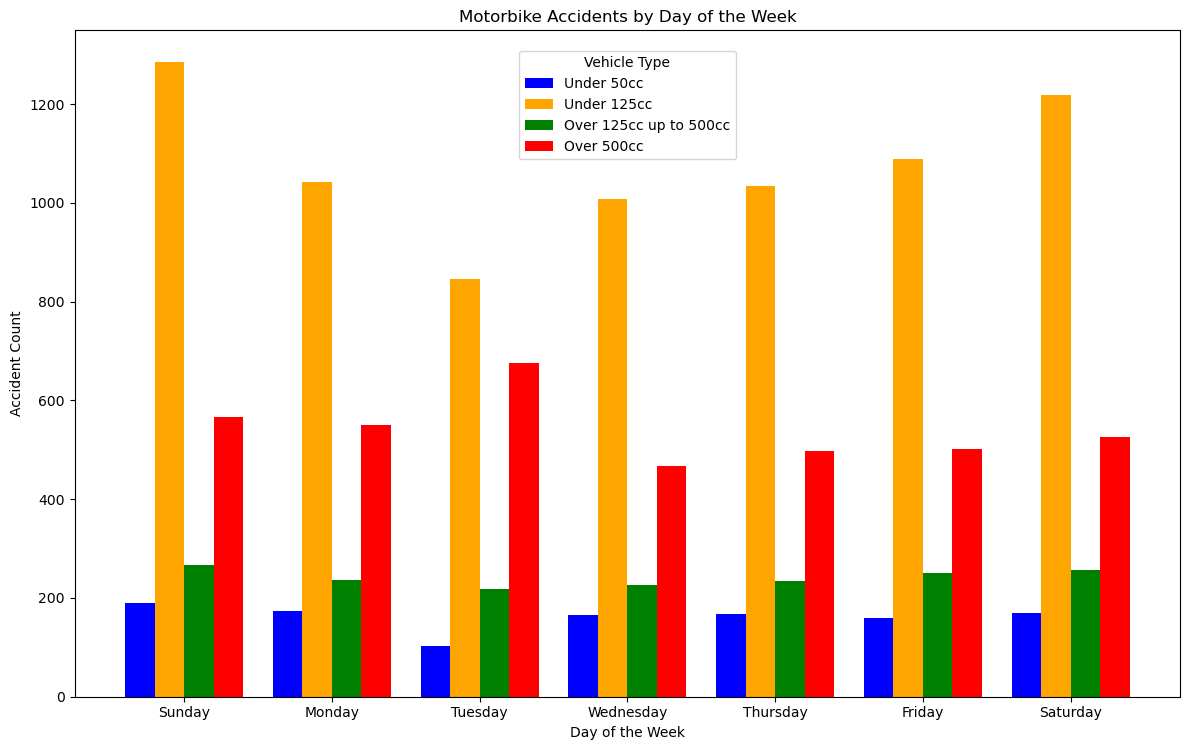

In [33]:
# Creating multiplebars plot for different motorcycle types
fig, ax = plt.subplots(figsize=(12, 8))  

# Get the day_of_week values for the x-axis
x = df_motorbike_acc_day["day_of_week"]

# Plotting the 4 motorcycle types
ax.bar(x - 0.3, df_motorbike_acc_day["under_50"], width=0.2, align='center', label="Under 50cc", color='blue')
ax.bar(x - 0.1, df_motorbike_acc_day["under_125cc"], width=0.2, align='center', label="Under 125cc", color='orange')
ax.bar(x + 0.1, df_motorbike_acc_day["over_125cc_up_to_500cc"], width=0.2, align='center', label="Over 125cc up to 500cc", color='green')
ax.bar(x + 0.3, df_motorbike_acc_day["over_500cc"], width=0.2, align='center', label="Over 500cc", color='red')

# Customize the plot
plt.title("Motorbike Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Accident Count")
plt.xticks(x, ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

# Centering the color legend for the categories inside the plot 
plt.legend(title="Vehicle Type", loc="upper center", bbox_to_anchor=(0.5, 0.98), bbox_transform=ax.transAxes)

# Adjustinf the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  

# Show the plot
plt.show()


### 3a. Significant hours of the day on which pedestrians are more likely to be involved in accidents?

In [34]:
#Pedestrian accident by time of the day

cur.execute("""
    SELECT strftime('%H', time) || ':00 - ' || strftime('%H', time) || ':59' AS time_range,
           SUM(1) AS accident_count
    FROM accident 
    JOIN casualty 
    ON casualty.accident_index = accident.accident_index
    WHERE casualty.casualty_class=3 AND accident.accident_year=2020
    GROUP BY strftime('%H', time) 
    ORDER BY strftime('%H', time)
""")

# Fetch the results
pedestrian_accident_time = cur.fetchall()

# Print the results
for i in pedestrian_accident_time:
    time_range = i[0]
    accident_count = i[1]
    print("Time range:", time_range, "Accident count:", accident_count)


Time range: 00:00 - 00:59 Accident count: 173
Time range: 01:00 - 01:59 Accident count: 144
Time range: 02:00 - 02:59 Accident count: 83
Time range: 03:00 - 03:59 Accident count: 82
Time range: 04:00 - 04:59 Accident count: 50
Time range: 05:00 - 05:59 Accident count: 74
Time range: 06:00 - 06:59 Accident count: 173
Time range: 07:00 - 07:59 Accident count: 514
Time range: 08:00 - 08:59 Accident count: 1060
Time range: 09:00 - 09:59 Accident count: 607
Time range: 10:00 - 10:59 Accident count: 644
Time range: 11:00 - 11:59 Accident count: 725
Time range: 12:00 - 12:59 Accident count: 809
Time range: 13:00 - 13:59 Accident count: 833
Time range: 14:00 - 14:59 Accident count: 1015
Time range: 15:00 - 15:59 Accident count: 1672
Time range: 16:00 - 16:59 Accident count: 1323
Time range: 17:00 - 17:59 Accident count: 1274
Time range: 18:00 - 18:59 Accident count: 1146
Time range: 19:00 - 19:59 Accident count: 824
Time range: 20:00 - 20:59 Accident count: 518
Time range: 21:00 - 21:59 Accide

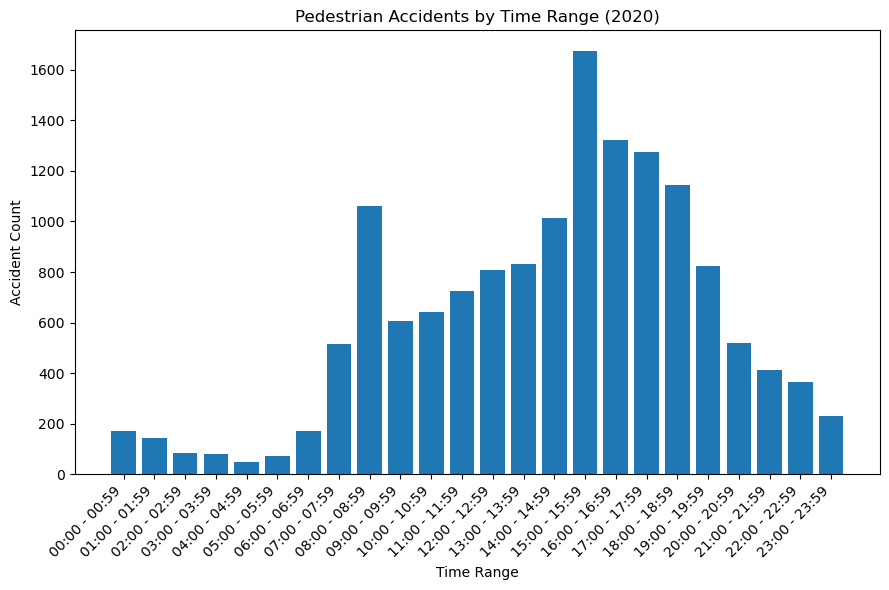

In [35]:
# plot of Pedestrian accident by time of the day

ped_time = []
ped_acc_count_time = []

for i in pedestrian_accident_time:
    time_range = i[0]
    accident_count = i[1]
    ped_time.append(time_range)
    ped_acc_count_time.append(accident_count)

# Plotting the data as a bar plot
plt.figure(figsize=(9, 6))
plt.bar(ped_time, ped_acc_count_time)

plt.xlabel("Time Range")
plt.ylabel("Accident Count")
plt.title("Pedestrian Accidents by Time Range (2020)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3b. Significant days of the week on which pedestrians are more likely to be involved in accidents?

In [36]:
# pedestrian accidents by days of the week

cur.execute("""
    SELECT strftime('%w', day_of_week) AS day_of_week,
           SUM(1) AS accident_count
    FROM accident 
    JOIN casualty 
    ON casualty.accident_index = accident.accident_index
    WHERE casualty.casualty_class=3 AND accident.accident_year=2020
    GROUP BY day_of_week
    ORDER BY accident_count DESC
""")

# Fetch the results
pedestrian_accident_day = cur.fetchall()

# Print the results
for i in pedestrian_accident_day:
    day_of_week = int(i[0]) + 1
    accident_count = i[1]
    print("Day of the week:", day_of_week, "Accident count:", accident_count)


Day of the week: 1 Accident count: 2543
Day of the week: 7 Accident count: 2366
Day of the week: 5 Accident count: 2267
Day of the week: 6 Accident count: 2247
Day of the week: 4 Accident count: 2207
Day of the week: 2 Accident count: 1878
Day of the week: 3 Accident count: 1242


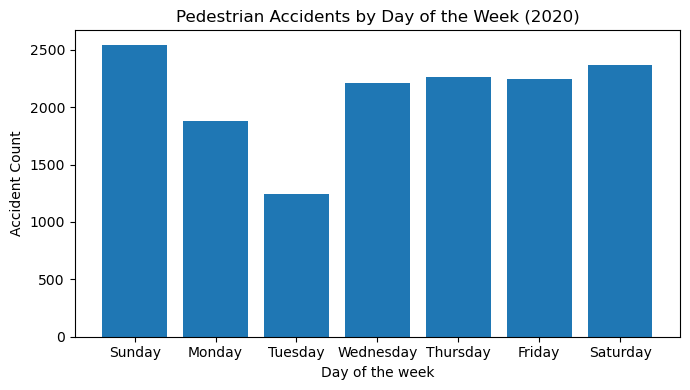

In [37]:
#plot of pedestrian accidents by days in the week

week_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
acc_count_day = [0] * 7

for i in pedestrian_accident_day:
    day_of_week = int(i[0]) + 1
    accident_count = i[1]
    acc_count_day[day_of_week - 1] = accident_count

# Plotting the data as a bar plot
plt.figure(figsize=(7, 4))
plt.bar(week_days, acc_count_day)

plt.xlabel("Day of the week")
plt.ylabel("Accident Count")
plt.title("Pedestrian Accidents by Day of the Week (2020)")
plt.tight_layout()
plt.show()

### 4.Using the apriori algorithm, explore the impact of selected variables on accident severity.  

In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
accident_data["accident_severity"].unique()

array([3, 2, 1], dtype=int64)

In [40]:
accident_data.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [41]:
accident_data["speed_limit"].unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [42]:
accident_data["weather_conditions"].unique()

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1], dtype=int64)

### One hoting

In [43]:
a_severity = pd.get_dummies(accident_data.accident_severity, prefix = "severity")

a_severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
91194,0,1,0
91195,0,0,1
91196,0,1,0
91197,0,0,1


In [44]:
speed = pd.get_dummies(accident_data.speed_limit, prefix = "Speedlimit")

speed 

,Speedlimit_-1,Speedlimit_20,Speedlimit_30,Speedlimit_40,Speedlimit_50,Speedlimit_60,Speedlimit_70
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
91194,0,0,1,0,0,0,0
91195,0,0,1,0,0,0,0
91196,0,0,0,0,0,1,0
91197,0,0,1,0,0,0,0


In [45]:
weather = pd.get_dummies(accident_data.weather_conditions, prefix = "weathercondition")

weather

,weathercondition_-1,weathercondition_1,weathercondition_2,weathercondition_3,weathercondition_4,weathercondition_5,weathercondition_6,weathercondition_7,weathercondition_8,weathercondition_9
0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,0,0,0,0,0,0,0
91195,0,1,0,0,0,0,0,0,0,0
91196,0,1,0,0,0,0,0,0,0,0
91197,0,1,0,0,0,0,0,0,0,0


In [46]:
light = pd.get_dummies(accident_data.light_conditions, prefix = "lightcondition")

light

,lightcondition_-1,lightcondition_1,lightcondition_4,lightcondition_5,lightcondition_6,lightcondition_7
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
91194,0,1,0,0,0,0
91195,0,1,0,0,0,0
91196,0,1,0,0,0,0
91197,0,1,0,0,0,0


In [47]:
sex_driver = pd.get_dummies(vehicle_data.sex_of_driver, prefix = "sex")

sex_driver

,sex_-1,sex_1,sex_2,sex_3
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
167370,0,1,0,0
167371,0,1,0,0
167372,0,0,1,0
167373,0,1,0,0


In [48]:
accident_data[accident_data['light_conditions'] == -1]['light_conditions'].count()

1

In [49]:
combined_acc_df = pd.concat([a_severity, speed, weather], axis=1)

combined_acc_df

,severity_1,severity_2,severity_3,Speedlimit_-1,Speedlimit_20,Speedlimit_30,Speedlimit_40,Speedlimit_50,Speedlimit_60,Speedlimit_70,weathercondition_-1,weathercondition_1,weathercondition_2,weathercondition_3,weathercondition_4,weathercondition_5,weathercondition_6,weathercondition_7,weathercondition_8,weathercondition_9
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
91195,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
91196,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
91197,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [50]:
# There are no missing values

combined_acc_df.isnull().sum()

severity_1             0
severity_2             0
severity_3             0
Speedlimit_-1          0
Speedlimit_20          0
Speedlimit_30          0
Speedlimit_40          0
Speedlimit_50          0
Speedlimit_60          0
Speedlimit_70          0
weathercondition_-1    0
weathercondition_1     0
weathercondition_2     0
weathercondition_3     0
weathercondition_4     0
weathercondition_5     0
weathercondition_6     0
weathercondition_7     0
weathercondition_8     0
weathercondition_9     0
dtype: int64

In [51]:
#frequency of item sets

apriori_set = apriori(combined_acc_df, min_support = 0.2, use_colnames = True)

apriori_set  

C:\Users\Danile\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.201263,(severity_2)
1,0.783484,(severity_3)
2,0.573033,(Speedlimit_30)
3,0.775546,(weathercondition_1)
4,0.459983,"(Speedlimit_30, severity_3)"
5,0.603186,"(weathercondition_1, severity_3)"
6,0.450137,"(Speedlimit_30, weathercondition_1)"
7,0.359697,"(Speedlimit_30, weathercondition_1, severity_3)"


In [52]:
rules = association_rules(apriori_set, metric = "lift", min_threshold = 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Speedlimit_30),(severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116
1,(severity_3),(Speedlimit_30),0.783484,0.573033,0.459983,0.587099,1.024548,0.011021,1.034068,0.110660
2,(weathercondition_1),(severity_3),0.775546,0.783484,0.603186,0.777757,0.992690,-0.004442,0.974230,-0.031765
3,(severity_3),(weathercondition_1),0.783484,0.775546,0.603186,0.769877,0.992690,-0.004442,0.975365,-0.032891
4,(Speedlimit_30),(weathercondition_1),0.573033,0.775546,0.450137,0.785534,1.012879,0.005723,1.046572,0.029780
5,(weathercondition_1),(Speedlimit_30),0.775546,0.573033,0.450137,0.580413,1.012879,0.005723,1.017589,0.056649
6,"(Speedlimit_30, weathercondition_1)",(severity_3),0.450137,0.783484,0.359697,0.799084,1.019911,0.007022,1.077643,0.035503
7,"(Speedlimit_30, severity_3)",(weathercondition_1),0.459983,0.775546,0.359697,0.781979,1.008294,0.002959,1.029505,0.015233
8,"(weathercondition_1, severity_3)",(Speedlimit_30),0.603186,0.573033,0.359697,0.596328,1.040653,0.014051,1.057709,0.098446
9,(Speedlimit_30),"(weathercondition_1, severity_3)",0.573033,0.603186,0.359697,0.627708,1.040653,0.014051,1.065865,0.091493


### 5. Accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire

In [53]:
#accidents in Kingston upon Hull, Humberside and East Riding
#query selects relevant columns from accident, lsoa tables and performs using the primary key accident_index

cur.execute("""
SELECT accident.accident_index, accident.longitude, accident.latitude, lsoa.lsoa01nm
FROM accident 
JOIN casualty ON accident.accident_index = casualty.accident_index
JOIN vehicle ON accident.accident_index = vehicle.accident_index
JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
WHERE lsoa.lsoa01nm LIKE '%Kingston Upon Hull%' OR lsoa.lsoa01nm LIKE '%Humberside%' OR lsoa.lsoa01nm LIKE '%East Riding of Yorkshire%'
AND accident.accident_year=2020
""")

# Fetch all the rows and column names
cluster_rows = cur.fetchall()
cluster_columns = [description[0] for description in cur.description]

In [54]:
# Create a DataFrame from the fetched rows and column names
cluster_df = pd.DataFrame(cluster_rows, columns=cluster_columns)

# Print the resulting DataFrame
cluster_df

,accident_index,longitude,latitude,lsoa01nm
0,2017160143153,-0.393435,53.745044,Kingston upon Hull 028C
1,2017160143153,-0.393435,53.745044,Kingston upon Hull 028C
2,2017160143188,-0.354873,53.743082,Kingston upon Hull 029A
3,2017160143188,-0.354873,53.743082,Kingston upon Hull 029A
4,2017160143188,-0.354873,53.743082,Kingston upon Hull 029A
...,...,...,...,...
7570,2020161014528,-0.424674,53.839482,East Riding of Yorkshire 019D
7571,2020161014528,-0.424674,53.839482,East Riding of Yorkshire 019D
7572,2020161014544,-0.308880,53.782750,Kingston upon Hull 007C
7573,2020161014949,-0.342063,53.742609,Kingston upon Hull 029C


In [55]:
# evidence of no missing values

cluster_df.isna().sum()

accident_index    0
longitude         0
latitude          0
lsoa01nm          0
dtype: int64

In [56]:
# evidence of duplicates

cluster_df.duplicated().sum()

4311

In [57]:
new_cluster_df = cluster_df.drop_duplicates()

In [58]:
df_loc = new_cluster_df[['longitude','latitude']]

df_loc

,longitude,latitude
0,-0.393435,53.745044
2,-0.354873,53.743082
6,-0.377055,53.750603
8,-0.286190,53.761096
10,-0.404602,53.730055
...,...,...
7566,-0.438783,53.776745
7568,-0.343885,53.781494
7570,-0.424674,53.839482
7572,-0.308880,53.782750


In [59]:
new_cluster_df.duplicated().sum()

0

### Clustering the Data
### K-Means

In [60]:
from sklearn.cluster import KMeans 

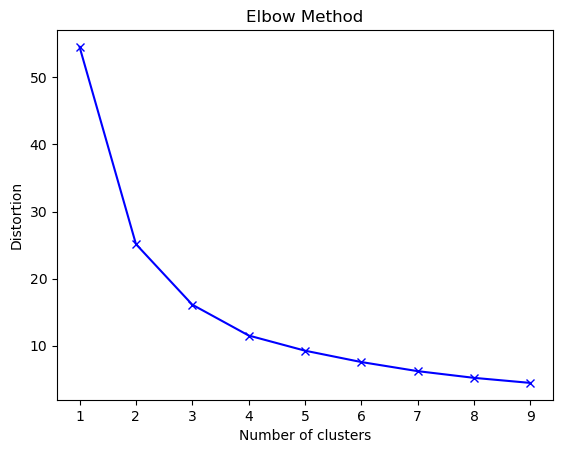

In [61]:
#This is used to determine the number of clusters

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_loc)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

### KMeans

In [62]:
#selects 3 clusters

kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_loc)

KMeans(n_clusters=3)

In [63]:
labels = kmeans.predict(df_loc)
centroids = kmeans.cluster_centers_

centroids

array([[-0.34557787, 53.76132643],
       [-0.79798524, 53.80560823],
       [-0.27509932, 54.04710506]])

In [64]:
labels

array([0, 0, 0, ..., 0, 0, 0])

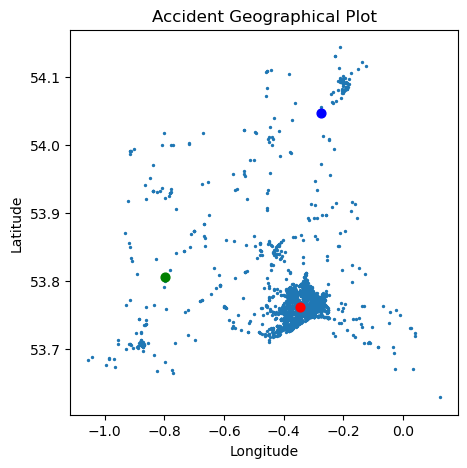

In [65]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df_loc["longitude"], df_loc["latitude"], s=2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Geographical Plot")
colors = ['red', 'green', 'blue']

for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1], color=colors[i], s=40)

plt.show()

In [66]:
#merging the data from the accident, casualty and vehicle tables

merged_data = (accident_data.merge(casualty_data, on='accident_index').merge(vehicle_data, on='accident_index'))
             
merged_data

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,2,1,45,7,1395,1,2,AUDI A1,7,1
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
220431,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
220433,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [67]:
# Remove all duplicated records in 'accident_index' column
merged_data.drop_duplicates(subset='accident_index', keep='first', inplace=True)

# Display the DataFrame after removing duplicates
merged_data

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,2,1,45,7,1395,1,2,AUDI A1,7,1
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
5,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220427,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,27,6,-1,-1,-1,-1,2,1
220429,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,3,2,39,7,1598,1,7,NISSAN QASHQAI,10,1
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,2,68,10,1995,2,1,BMW X3,5,1


In [68]:
#No duplicate records

merged_data['accident_index'].duplicated().sum()

0

### 6. Using outlier detection methods, identify unusual entries in your data set. 

#### Treating Outliers on Selected Columns- Detection
#### Treating Outliers on Selected Columns- Cleaning was done after feature selection

#### Age of Driver

In [69]:
Age_Driver = merged_data["age_of_driver"]

In [70]:
q75, q25 = np.percentile(Age_Driver, [75, 25])

iqr_driver = q75 - q25

print(iqr_driver)

26.0


In [71]:
#upper and lower limits

lower_limit_age_driver, upper_limit_age_driver = q25-1.5*iqr_driver, q75+1.5*iqr_driver

print (lower_limit_age_driver, upper_limit_age_driver)

-16.0 88.0


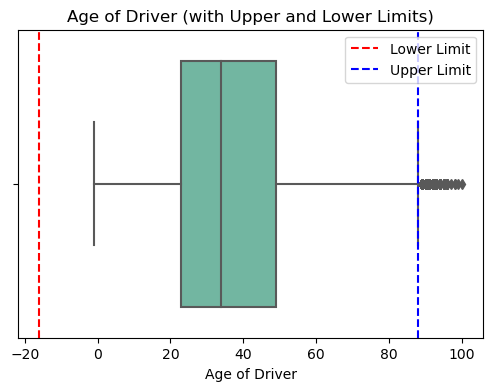

In [72]:
# Create the box plot using Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_data, x='age_of_driver', palette = 'Set2')

# Add vertical lines for the upper and lower limits
plt.axvline(x=lower_limit_age_driver, color='red', linestyle='--', label='Lower Limit')
plt.axvline(x=upper_limit_age_driver, color='blue', linestyle='--', label='Upper Limit')

plt.xlabel('Age of Driver')
plt.title('Age of Driver (with Upper and Lower Limits)')
plt.legend()
plt.show()

#### Age of Casualty

In [75]:
Age_casualty = merged_data["age_of_casualty"]

In [76]:
q75, q25 = np.percentile(Age_casualty, [75, 25])

iqr_casualty = q75 - q25

print(iqr_casualty)

26.0


In [77]:
upperlimit_age_casualty, lowerlimit_age_casualty = q25-1.5*iqr_casualty, q75+1.5*iqr_casualty

print(upperlimit_age_casualty, lowerlimit_age_casualty)


-15.0 89.0


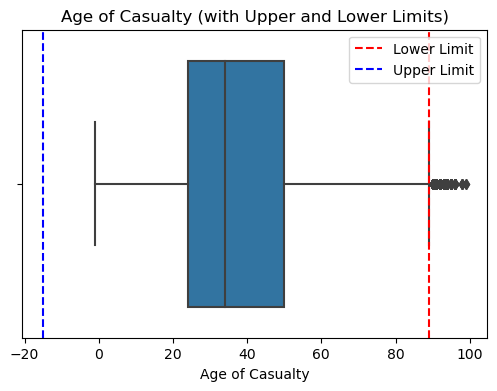

In [78]:
# Create the box plot using Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_data, x='age_of_casualty')

# Add vertical lines for the upper and lower limits
plt.axvline(x=lowerlimit_age_casualty, color='red', linestyle='--', label='Lower Limit')
plt.axvline(x=upperlimit_age_casualty, color='blue', linestyle='--', label='Upper Limit')

plt.xlabel('Age of Casualty')
plt.title('Age of Casualty (with Upper and Lower Limits)')
plt.legend()
#plt.show()

In [81]:
merged_data['age_of_casualty'].unique()

array([31,  2, 23, 47, 32, 25, 41, 50, 62, 37, -1, 33, 30, 18, 26, 29, 38,
       80, 19, 21, 48, 20, 79, 45, 27, 51, 83, 52, 43, 22, 59, 60, 42, 77,
       12, 54, 10, 40, 39, 56, 24, 88, 11,  9, 35,  5, 16, 57, 44,  6, 49,
       46, 53, 28, 69, 15, 76, 36,  3, 55, 61, 85,  4, 58, 73, 65, 78, 71,
       14, 13,  8, 34, 17, 64,  1, 68, 91, 66, 67, 92, 87, 74, 75, 63, 70,
        0, 84, 86, 94,  7, 72, 90, 81, 82, 89, 93, 96, 95, 98, 99],
      dtype=int64)

In [82]:
merged_data

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,2,1,45,7,1395,1,2,AUDI A1,7,1
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
5,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220427,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,27,6,-1,-1,-1,-1,2,1
220429,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,3,2,39,7,1598,1,7,NISSAN QASHQAI,10,1
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,6,2,68,10,1995,2,1,BMW X3,5,1


#### Speed Limit

In [83]:
speed_lim = merged_data["speed_limit"]

In [84]:
q75, q25 = np.percentile(speed_lim, [75, 25])

iqr_speed = q75 - q25

print(iqr_speed)

10.0


In [85]:
speedlimit_lower,speedlimit_upper = q25-1.5*iqr_speed, q75+1.5*iqr_speed

print(speedlimit_lower,speedlimit_upper)

15.0 55.0


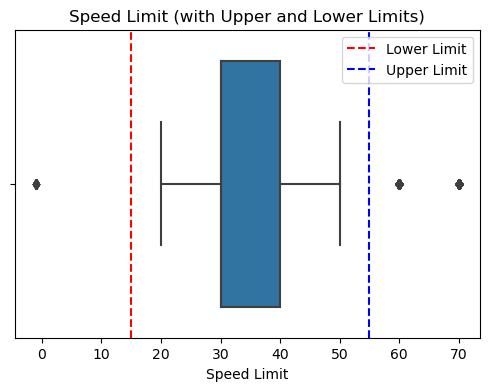

In [86]:
# Create the box plot using Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_data, x='speed_limit')

# Add vertical lines for the upper and lower limits
plt.axvline(x=speedlimit_lower, color='red', linestyle='--', label='Lower Limit')
plt.axvline(x=speedlimit_upper, color='blue', linestyle='--', label='Upper Limit')

plt.xlabel('Speed Limit')
plt.title('Speed Limit (with Upper and Lower Limits)')
plt.legend()
plt.show()

## Feature Selection and Data Preprocessing

In [87]:
merged_data.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'casualty_index',
       'accident_year_y', 'accident_reference_y', 'vehicle_reference_x',
  

In [88]:
#converting the target column to signify true for fatal, false for non fatal

y_label = merged_data["accident_severity"].replace([1,2,3], [True, False, False])

y_label

0         False
1         False
3         False
4         False
5         False
          ...  
220427    False
220429    False
220430    False
220432    False
220434    False
Name: accident_severity, Length: 91199, dtype: bool

In [89]:
merged_data['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

In [90]:
class_count = y_label.value_counts()

class_count

False    89808
True      1391
Name: accident_severity, dtype: int64

Text(0.5, 1.0, 'Imbalance in Accident Severity')

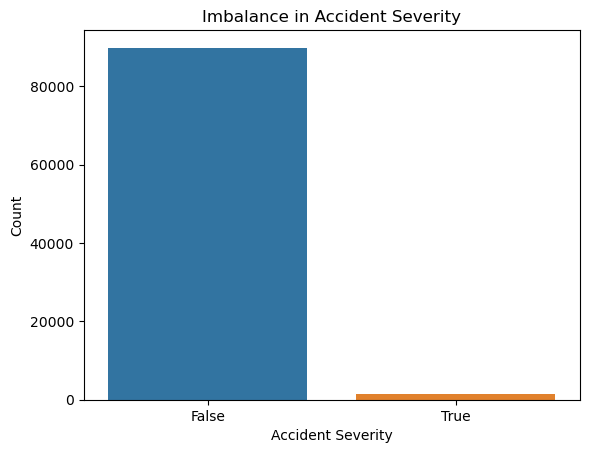

In [91]:
# This shows the imbalance in the data
sns.countplot(x=y_label)

# Set labels for the plot
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Imbalance in Accident Severity")

### Balance The Data

In [92]:
!pip install imbalanced-learn

In [93]:
#Importing relevant libraries balance data and perform feature selection

from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, chi2, f_regression,f_classif

In [94]:
#deleting accident severity as this is the column being predicted and other bunch of irrelevant columns
#casualty severity is practically thesame as accident severity, including it will surpress the predictive power of other columns

del merged_data['accident_severity']
del merged_data['casualty_severity']
del merged_data['did_police_officer_attend_scene_of_accident']

drop_data = merged_data.dropna()
drop_data

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,1,1,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,1,2,...,2,1,45,7,1395,1,2,AUDI A1,7,1
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,1,1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,1,1,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
5,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,1,2,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220427,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,1,...,1,1,27,6,-1,-1,-1,-1,2,1
220429,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,1,1,...,3,2,39,7,1598,1,7,NISSAN QASHQAI,10,1
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,1,...,1,1,57,9,1968,2,2,AUDI A5,7,1
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,2,1,...,6,2,68,10,1995,2,1,BMW X3,5,1


In [95]:
#balancing the dataframe

df_acc_balanced, y_balanced = RandomUnderSampler().fit_resample(drop_data, y_label)

df_acc_balanced

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020460989661,2020,460989661,588856.0,164076.0,0.710330,51.344387,46,2,1,...,6,2,20,4,1240,1,14,NISSAN MICRA,1,1
1,2020430070901,2020,430070901,496881.0,187200.0,-0.603355,51.575354,43,1,1,...,6,1,65,9,-1,-1,-1,-1,10,1
2,2020137BE1859,2020,137BE1859,428109.0,426284.0,-1.575403,53.732213,13,2,2,...,1,1,46,8,998,1,7,FORD FIESTA,8,2
3,2020420950989,2020,420950989,597036.0,223400.0,0.860945,51.874365,42,2,1,...,6,2,79,11,998,1,1,FORD FIESTA,8,3
4,2020420918790,2020,420918790,577001.0,188467.0,0.552489,51.567298,42,2,1,...,5,1,30,6,1560,2,12,CITROEN BERLINGO,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2020991006874,2020,991006874,254367.0,661245.0,-4.326142,55.822415,99,1,1,...,5,1,33,6,1994,1,16,SUBARU IMPREZA,2,1
2778,2020991009077,2020,991009077,270790.0,659812.0,-4.063523,55.814225,99,2,1,...,2,1,46,8,1995,2,7,BMW X3,3,2
2779,2020991010035,2020,991010035,113410.0,903322.0,-6.842655,57.926736,99,1,1,...,5,1,29,6,1461,2,1,NISSAN NV200,5,3
2780,2020991010115,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,2,1,...,5,1,48,8,1499,2,4,FORD FOCUS,9,3


In [96]:
y_balanced.value_counts()

False    1391
True     1391
Name: accident_severity, dtype: int64

Text(0.5, 1.0, 'Balanced Data: Accident Severity')

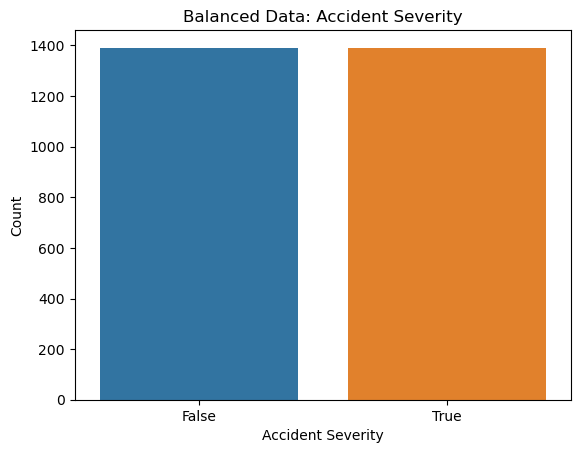

In [97]:
sns.countplot(x=y_balanced)

# Set labels for the plot
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Balanced Data: Accident Severity")

In [98]:
X = df_acc_balanced 
y = y_balanced     

In [99]:
# selecting numeric columns from the balanced dataframe

numeric_data = df_acc_balanced.select_dtypes(include=[np.number])

In [100]:
X = numeric_data   #Xfeatures
y = y_balanced     #target

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
# Label encode the categorical features in X
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = label_encoder.fit_transform(X[col])

### Feature Selection

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [104]:
# selecting the best 10 features for modeling

selector = SelectKBest(f_classif, k = 10)
selector.fit(X, y)

C:\Users\Danile\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 28 44] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Danile\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest()

In [105]:
# Selecting the variables

mask = selector.get_support()
selected_variables = selector.feature_names_in_[mask]
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

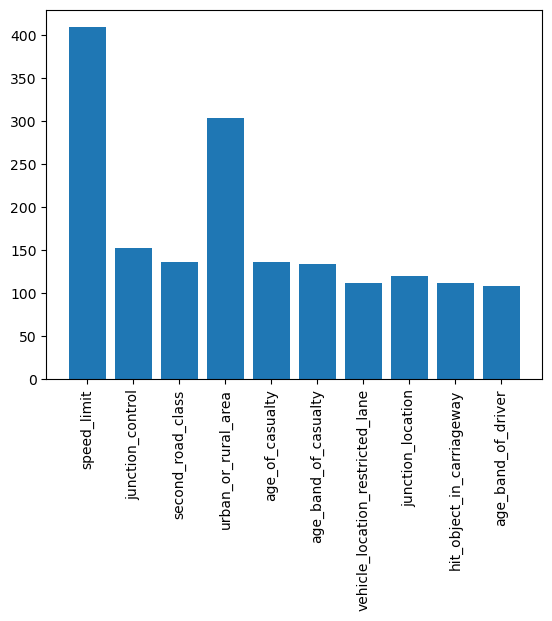

In [106]:
#plotting the best 10 variables

plt.bar(selected_variables, scores)
plt.xticks(rotation = 'vertical')

In [107]:
print (selected_variables)

['speed_limit' 'junction_control' 'second_road_class'
 'urban_or_rural_area' 'age_of_casualty' 'age_band_of_casualty'
 'vehicle_location_restricted_lane' 'junction_location'
 'hit_object_in_carriageway' 'age_band_of_driver']


### Stage 2 Cleaning

In [108]:
# List of selected columns
# I decided to use the selected columns this way so I can manually input columns if I so decide

selected_columns = ['speed_limit', 'junction_control', 'second_road_class',
                    'urban_or_rural_area', 'age_band_of_casualty', 'age_of_casualty',
                    'vehicle_reference_x', 'vehicle_location_restricted_lane',
                    'junction_location', 'sex_of_driver']

# Create the 'classify_df' DataFrame using selected columns from 'numeric_data'
classify_df = numeric_data[selected_columns]

In [109]:
#No missing values

classify_df.isna().sum()

speed_limit                         0
junction_control                    0
second_road_class                   0
urban_or_rural_area                 0
age_band_of_casualty                0
age_of_casualty                     0
vehicle_reference_x                 0
vehicle_location_restricted_lane    0
junction_location                   0
sex_of_driver                       0
dtype: int64

In [110]:
#iterating through the datafrane to produce unique values

vehicle_unique = {}

for i in classify_df.columns:
     vehicle_unique[i] = classify_df[i].unique()

for i, v in vehicle_unique.items():
     print(f"Column: {i}, Unique Values: {v}")

Column: speed_limit, Unique Values: [50 30 20 40 60 70 -1]
Column: junction_control, Unique Values: [-1  2  4  1  9  3]
Column: second_road_class, Unique Values: [ 0  3  6  4  5  1 -1  2]
Column: urban_or_rural_area, Unique Values: [1 2]
Column: age_band_of_casualty, Unique Values: [ 9  8 11  4  7  5  6 10  1  3 -1  2]
Column: age_of_casualty, Unique Values: [62 65 46 84 47 60 20 40 23 35 29 44 42 69 45 22 33 64 34 30 83 17 51 54
  3 24 31 80 15 28 79 19 56 68 53 21 48 12 36 72 59 25 32 74 61 39 26 52
 50 70 71 73 18 38 49 27 57 14  5 43 37 63 16 76 81 66 75 67 -1 10 90 41
 85 58  6 77 55  7 11  4 95 78  1 94 82 13  2 87  9  0 91 89 92 86  8 88
 93]
Column: vehicle_reference_x, Unique Values: [2 1 3 6 4]
Column: vehicle_location_restricted_lane, Unique Values: [ 0 99  9  4  6  2 -1  7  5  8  1]
Column: junction_location, Unique Values: [ 0  8  1  9  6  4  3  2  5  7 -1]
Column: sex_of_driver, Unique Values: [2 1 3]


In [111]:
#This code gives all the columns that have -1 in them
# Initialize an empty dictionary to store column names and counts
column_counts = {}

# Iterate over the columns in classify_df
for column in classify_df.columns:
    # Count the occurrences of -1 in the current column
    count = (classify_df[column] == -1).sum()
    
    # Add the column name and count to the dictionary
    column_counts[column] = count

# Print the results
for column, count in column_counts.items():
    print(f"Column '{column}': {count}")

Column 'speed_limit': 1
Column 'junction_control': 1493
Column 'second_road_class': 2
Column 'urban_or_rural_area': 0
Column 'age_band_of_casualty': 19
Column 'age_of_casualty': 19
Column 'vehicle_reference_x': 0
Column 'vehicle_location_restricted_lane': 7
Column 'junction_location': 1
Column 'sex_of_driver': 0


In [112]:
# Other invalid entries count

classify_df[classify_df['junction_location'] == -1]['junction_location'].count()

1

In [113]:
# Other invalid entries count

classify_df[classify_df['junction_control'] == 9]['junction_control'].count()

22

In [114]:
#cleaning the columns with that are continuous

def clean_columns():
    classify_df["age_of_casualty"].replace(-1, classify_df["age_of_casualty"].median(), inplace=True)
    classify_df["age_band_of_casualty"].replace(-1, classify_df["age_band_of_casualty"].median(), inplace=True)
    classify_df["speed_limit"].replace(-1, classify_df["speed_limit"].median(), inplace=True)
clean_columns()

C:\Users\Danile\AppData\Local\Temp\ipykernel_3344\1173178284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classify_df["age_of_casualty"].replace(-1, classify_df["age_of_casualty"].median(), inplace=True)
C:\Users\Danile\AppData\Local\Temp\ipykernel_3344\1173178284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classify_df["age_band_of_casualty"].replace(-1, classify_df["age_band_of_casualty"].median(), inplace=True)
C:\Users\Danile\AppData\Local\Temp\ipykernel_3344\1173178284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

### Fixing Outliers

#### Determining if Outliers in Speedlimit Should Be Considered as True outliers and should be cleaned

In [115]:
#speed limit in the uk depends on the roadtype and car involved
#using the IQR, the upper limit has a 55mph threshold
# Any one driving above that in specific roads that do not allow that are classified outliers
#the below code provides the catgories of road type for the those driving at 60,70 mph

speed_limit_60_70 = numeric_data[(numeric_data['speed_limit'] == 60) | (numeric_data['speed_limit'] == 70)]
road_type_categories = speed_limit_60_70.groupby('speed_limit')['road_type'].unique()
print(road_type_categories)

speed_limit
60    [6, 1, 3, 9, 7]
70          [7, 3, 1]
Name: road_type, dtype: object


In [116]:
#car categories driving above 60mph

speed_limit_above_60 = numeric_data[numeric_data['speed_limit'] > 60]
road_type_categories = speed_limit_above_60.groupby('speed_limit')['road_type'].unique()
print(road_type_categories)

speed_limit
70    [7, 3, 1]
Name: road_type, dtype: object


In [117]:
#car categories driving above 70mph
# No car was driving above this

speed_limit_above_60 = numeric_data[numeric_data['speed_limit'] > 70]
road_type_categories = speed_limit_above_60.groupby('speed_limit')['road_type'].unique()
print(road_type_categories)

Series([], Name: road_type, dtype: int64)


In [118]:
#those driving at 70mph at roundabout and slip road
#this represents 0.754%, less than 1% of the numeric data

speed_limit_70 = numeric_data[numeric_data['speed_limit'] == 70]
count_slip_road = speed_limit_70[speed_limit_70['road_type'] == 7].shape[0]
count_roundabout = speed_limit_70[speed_limit_70['road_type'] == 1].shape[0]

print("Count of speed_limit 70mph on slip road:", count_slip_road)
print("Count of speed_limit 70mph on roundabout:", count_roundabout)

Count of speed_limit 70mph on slip road: 13
Count of speed_limit 70mph on roundabout: 3


In [119]:
# treating selected outliers columns in the below column by inputting the median age

def clean_labels(df):
    # Calculate the median of the "age_of_casualty" column
    median_age_casualty = df["age_of_casualty"].median()

    # Replace values less than lower limit with the median
    df.loc[df["age_of_casualty"] < lowerlimit_age_casualty, "age_of_casualty"] = median_age_casualty

    # Replace values greater than upper limit with the mean
    df.loc[df["age_of_casualty"] > upperlimit_age_casualty, "age_of_casualty"] = median_age_casualty

#Call the function and pass the DataFrame "classify_df"
clean_labels(classify_df)

C:\Users\Danile\AppData\Local\Temp\ipykernel_3344\400392612.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["age_of_casualty"] < lowerlimit_age_casualty, "age_of_casualty"] = median_age_casualty
C:\Users\Danile\AppData\Local\Temp\ipykernel_3344\400392612.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["age_of_casualty"] > upperlimit_age_casualty, "age_of_casualty"] = median_age_casualty


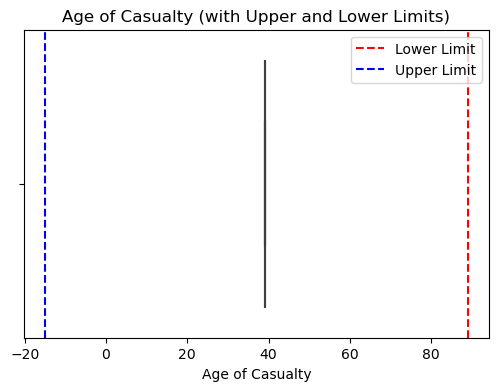

In [120]:
# Create the box plot using Seaborn for the "age_of_casualty" column
plt.figure(figsize=(6, 4))
sns.boxplot(data=classify_df, x='age_of_casualty')

# Add vertical lines for the upper and lower limits
plt.axvline(x=lowerlimit_age_casualty, color='red', linestyle='--', label='Lower Limit')
plt.axvline(x=upperlimit_age_casualty, color='blue', linestyle='--', label='Upper Limit')

plt.xlabel('Age of Casualty')
plt.title('Age of Casualty (with Upper and Lower Limits)')
plt.legend()
plt.show()

In [121]:
def fill_invalid_labels(df, column_name, correct_labels):
    # Find the records with invalid labels (-1 or 9)
    invalid_numbers = df[df[column_name].isin([-1, 9,11, 99])]

    # This calculates the number of invalid records and the number of valid labels
    num_invalid_records = len(invalid_numbers)
    num_valid_labels = len(correct_labels)

    # This calculates the number of invalid records to be assigned to each valid label
    count_per_valid_label = num_invalid_records // num_valid_labels

    # This assigns the invalid records equally to each valid label
    for i, valid_label in enumerate(correct_labels):
        start_idx = i * count_per_valid_label
        end_idx = (i + 1) * count_per_valid_label
        indices = invalid_numbers.index[start_idx:end_idx]
        df.loc[indices, column_name] = valid_label

# Correct labels for each column
correct_junction_control = [1, 2, 3, 4]
correct_second_road_class = [1, 2, 3, 4, 5, 6]
correct_junction_location = [0, 1, 2, 3, 4, 5, 6, 7, 8]


# Calling the function for each column
fill_invalid_labels(classify_df, 'junction_control', correct_junction_control)
fill_invalid_labels(classify_df, 'second_road_class', correct_second_road_class)
fill_invalid_labels(classify_df, 'junction_location', correct_junction_location)

C:\Users\Danile\AppData\Local\Temp\ipykernel_3344\869855943.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[indices, column_name] = valid_label


In [122]:
#record left becuase it could not be divided equally, it is insignificant to our analysis

classify_df[classify_df['junction_control'] == -1]['junction_control'].count()

3

In [123]:
#record left becuase it could not be divided equally, it is insignificant to our analysis

classify_df[classify_df['junction_location'] == 9]['junction_location'].count()

4

In [124]:
#record is left becuase it could not be divided equally, it is insignificant to our analysis

classify_df[classify_df['second_road_class'] == -1]['second_road_class'].count()

2

## Classification Model
### Predicting  Fatal Injuries In Road Traffic Accidents

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [126]:
X = classify_df
y = y_balanced

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [128]:
classify_df

,speed_limit,junction_control,second_road_class,urban_or_rural_area,age_band_of_casualty,age_of_casualty,vehicle_reference_x,vehicle_location_restricted_lane,junction_location,sex_of_driver
0,50,1,0,1,9,39,2,0,0,2
1,30,1,0,2,9,39,1,0,0,1
2,30,2,3,1,8,39,1,0,8,1
3,30,4,6,1,11,39,2,0,1,2
4,30,4,6,1,8,39,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
2777,40,4,0,1,8,39,1,9,0,1
2778,70,4,0,1,5,39,1,0,0,1
2779,60,-1,0,2,6,39,1,0,0,1
2780,60,-1,0,2,6,39,2,0,0,1


### Decison Tree

In [129]:
dtree = DecisionTreeClassifier(criterion= 'gini')

In [130]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluating The Model

In [131]:
ypredict = dtree.predict(X_test)

In [132]:
acc_dtree = round(dtree.score(X_train, y_train) * 100, 2)

In [133]:
print(classification_report(y_test, ypredict, zero_division=1))

              precision    recall  f1-score   support

       False       0.76      0.84      0.80       346
        True       0.82      0.74      0.78       350

    accuracy                           0.79       696
   macro avg       0.79      0.79      0.79       696
weighted avg       0.79      0.79      0.79       696



<Figure size 2000x3000 with 0 Axes>

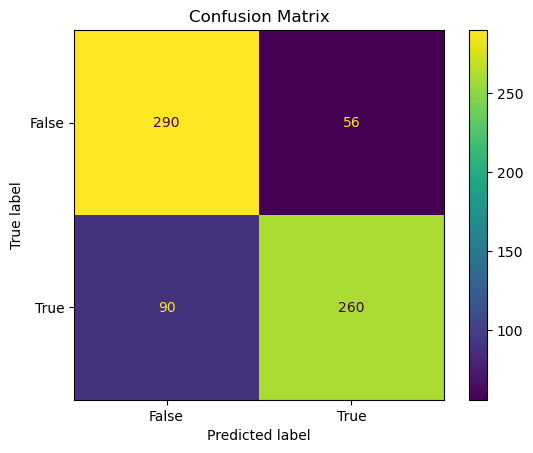

In [134]:
# Print the confusion matrix
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,ypredict) #display_labels=)
plt.title('Confusion Matrix')
plt.show()

In [135]:
# Assuming you have already defined dtree and it contains feature_names_in_ and feature_importances_.

data = np.array([dtree.feature_names_in_, dtree.feature_importances_]).T
df_importance = pd.DataFrame(data, columns=["Feature", "Importance"])

In [136]:
df_importance.sort_values("Importance", ascending = False)

,Feature,Importance
2,second_road_class,0.319028
1,junction_control,0.247043
4,age_band_of_casualty,0.146746
0,speed_limit,0.087474
8,junction_location,0.081284
9,sex_of_driver,0.037051
6,vehicle_reference_x,0.033731
7,vehicle_location_restricted_lane,0.024913
3,urban_or_rural_area,0.02273
5,age_of_casualty,0.0


### Decision Tree Classifier Cross Validation

In [137]:
# Fit decision tree classifier #training process
tree_cross = DecisionTreeClassifier()

In [138]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [139]:
# Perform cross-validation
cross_score = cross_val_score(tree_cross, X, y, cv=cv)

In [140]:
# Fit classifier on entire dataset
tree_cross.fit(X, y)

DecisionTreeClassifier()

In [141]:
# Make predictions on testing data
cross_pred = tree_cross.predict(X_test)

In [142]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, cross_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.97      0.94       346
        True       0.97      0.90      0.93       350

    accuracy                           0.94       696
   macro avg       0.94      0.94      0.94       696
weighted avg       0.94      0.94      0.94       696



### Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
gnb = GaussianNB()

In [145]:
gnb.fit(X_train, y_train)

GaussianNB()

In [146]:
#Testing the model
gnbpred = gnb.predict(X_test)

In [147]:
print(classification_report(y_test, gnbpred, zero_division=1))

              precision    recall  f1-score   support

       False       0.84      0.52      0.64       346
        True       0.66      0.90      0.76       350

    accuracy                           0.71       696
   macro avg       0.75      0.71      0.70       696
weighted avg       0.75      0.71      0.70       696



<Figure size 2000x3000 with 0 Axes>

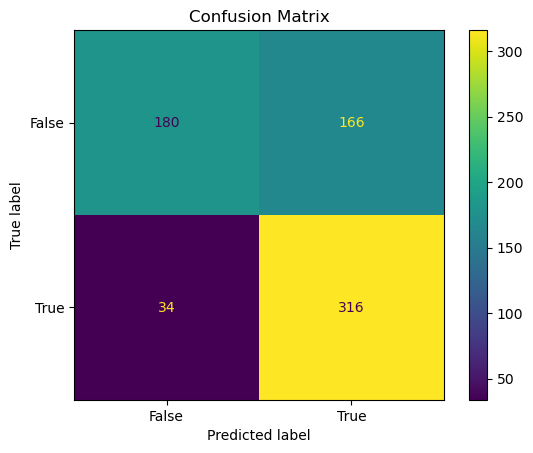

In [148]:
# Print the confusion matrix
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,gnbpred) #display_labels=)
plt.title('Confusion Matrix')
plt.show()

In [149]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest

In [150]:
Rfc = RandomForestClassifier()

In [151]:
Rfc.fit(X_train, y_train)

RandomForestClassifier()

In [152]:
Rfc_pred = Rfc.predict(X_test)

In [153]:
print(classification_report(y_test,Rfc_pred))

              precision    recall  f1-score   support

       False       0.77      0.86      0.81       346
        True       0.84      0.75      0.79       350

    accuracy                           0.80       696
   macro avg       0.81      0.80      0.80       696
weighted avg       0.81      0.80      0.80       696



In [161]:
# Closing the cursor and the database connection
cur.close()
con.close()